# Tossing a Fair Coin

Let $X$ be a random variable representing the outcome of tossing a fair coin. The return $R$ from each play of the game is defined as:

$$
R = 
\begin{cases}
0.05 & \text{(gain 5\% of previous wealth) if } X = H \\\\
-0.05 & \text{(lose 5\% of previous wealth) if } X = T
\end{cases}
$$

where $\mathbb{P}(X = H) = \mathbb{P}(X = T) = \frac{1}{2}$ .

The expected return (arithmetic average) is:

$$
\mu = \mathbb{E}[R] = \frac{1}{2} \times 0.05 + \frac{1}{2} \times (-0.05) = 0
$$

That means if we start with $1, we end up with $1 after playing the game... or do we?

The evolution of your wealth after $N$ plays of the game is given by:

$$
W_N = \prod_{t=1}^N (1 + R_t)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_plays = 1000 # N: number of playing
R_plus_one = []
gain = 0.05
loss = -0.05

for _ in range(n_plays):
    # Simulate coin tosses
    if np.random.uniform() > 0.5:
        # H
        R_plus_one.append(1 + gain)
    else: 
        # T
        R_plus_one.append(1 + loss)

In [3]:
R_plus_one

[1.05,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 1.05,
 1.05,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 1.05,
 1.05,
 1.05,
 1.05,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 1.05,
 1.05,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 0.95,
 0.95,
 0.95,
 1.05,
 0.95,
 1.05,
 1.05,
 1.05,
 1.05,
 1.05,
 1.05,
 0.95,
 1.05,
 0.95,
 1.05,
 0.95,
 0.95,
 1.05,
 1.05,
 0.95,
 1.05,

In [4]:
W_N = np.prod(R_plus_one)
W_N

np.float64(0.3494488108634042)

In [5]:
W_N - 1

np.float64(-0.6505511891365958)

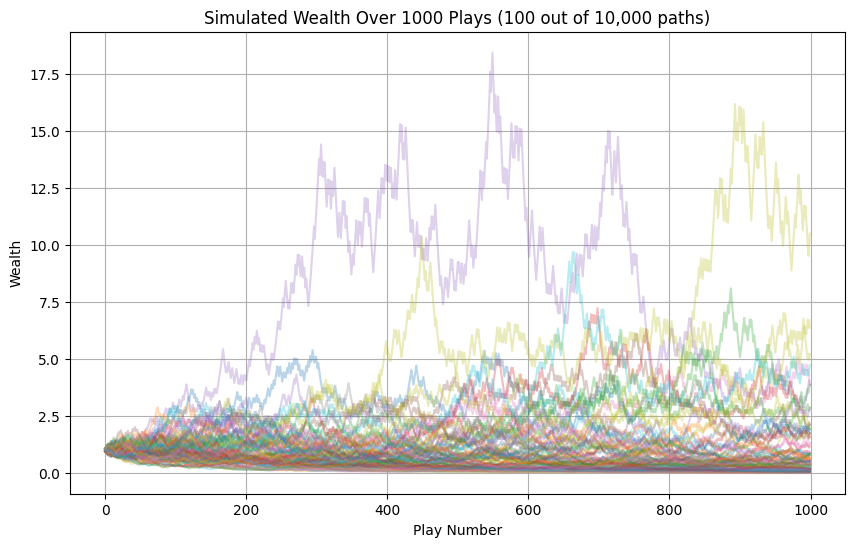

In [6]:
# Parameters
n_plays = 1000
n_paths = 10000
gain = 0.05
loss = -0.05

# Simulate coin tosses: 1 for Heads, 0 for Tails
coin_flips = np.random.randint(0, 2, size=(n_paths, n_plays))
# Map flips to returns: Heads → +5%, Tails → -5%
returns = np.where(coin_flips == 1, gain, loss)

# Compute wealth over time
wealth_paths = np.cumprod(1 + returns, axis=1)
final_wealth = wealth_paths[:, -1]

# Plot a few sample paths
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(wealth_paths[i], alpha=0.3)
plt.xlabel("Play Number")
plt.ylabel("Wealth")
plt.title("Simulated Wealth Over 1000 Plays (100 out of 10,000 paths)")
plt.grid(True)
plt.show()

In [7]:
# Print summary statistics
print(f"Median final wealth: {np.median(final_wealth):.4f}")
print(f"Mean final wealth: {np.mean(final_wealth):.4f}")
print(f"5th percentile wealth: {np.percentile(final_wealth, 5):.4f}")
print(f"95th percentile wealth: {np.percentile(final_wealth, 95):.4f}")

Median final wealth: 0.2861
Mean final wealth: 1.0213
5th percentile wealth: 0.0212
95th percentile wealth: 3.8598


# Volatility Tax

Consider playing a game $N$ times, where each round results in either a gain or a loss of a fixed return:

$R = 0.05$

Assuming an equal probability of gaining or losing (i.e., half the time you gain $+R$, and half the time you lose $-R$), the geometric return over $N$ plays is:

$$(1 + R)^{\frac{N}{2}} \cdot (1 - R)^{\frac{N}{2}}= [(1-R)(1+R)]^{\frac{N}{2}} = \left(1 - R^2\right)^{\frac{N}{2}} < 1$$

This result illustrates the **volatility tax**: even though the expected return per play is zero (i.e., the arithmetic average is $0$), the compounding effect of alternating gains and losses leads to a geometric return that **decays over time**. In other words, your wealth **shrinks** on average due to volatility, despite having no average gain or loss per round.


In [8]:
capital = 100_000_000

In [9]:
profit = 37_000 * 3

In [10]:
ret = profit / capital
ret

0.00111

In [13]:
(1 + ret) ** 365

1.4991905183465741